In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# regresion models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
# regressor models
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
# ensemble models
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
# model selection methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [4]:
# import Regressor metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [5]:
# loded dataset
ds=pd.read_csv('avocado.csv')
ds

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [6]:
ds['Date'].dtype   #check date type

dtype('O')

Date type is obj so first of all it convert into date time foramt.By this we easily pivot it day,month and year columns

In [7]:
ds=pd.read_csv('avocado.csv',parse_dates=['Date'])   #parse_dates=it convert obj type to date time type
ds

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [8]:
type(ds['Date'][0])   #check after convert type 

pandas._libs.tslibs.timestamps.Timestamp

it convert into timestamp type

# Split date variable in day,month,year

In [9]:
# datetime laibary
import datetime
dt=datetime.datetime.now()

In [10]:
ds['Day']=ds['Date'].dt.day   #convert into day columnns
ds['Month']=ds['Date'].dt.month  #convert into month columnns
ds['Year']=ds['Date'].dt.year   #convert into year columnns
ds

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month,Year
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12,2015
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12,2015
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12,2015
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12,2015
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4,2,2018
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,28,1,2018
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,21,1,2018
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,14,1,2018


In [11]:
#frame it into daatframe
df=pd.DataFrame(data=ds)
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month,Year
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12,2015
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12,2015
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12,2015
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12,2015
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4,2,2018
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,28,1,2018
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,21,1,2018
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,14,1,2018


Total Volume->4046 + 4225 + 4770 + Total Bags + Small Bags + Large Bags + XLarge Bags

Total Bags=Small Bags + Large Bags + XLarge Bags

Date-->we separate date into day,month,year formate so we remove Date and year columns

Unnames-->no significant

In [12]:
df.drop(['Unnamed: 0','Date','year','Total Bags','Total Volume'],axis=1,inplace=True)  #drop date bcoz ew split it

In [13]:
df

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region,Day,Month,Year
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,Albany,27,12,2015
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,Albany,20,12,2015
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,Albany,13,12,2015
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,Albany,6,12,2015
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,Albany,29,11,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0,organic,WestTexNewMexico,4,2,2018
18245,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0,organic,WestTexNewMexico,28,1,2018
18246,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0,organic,WestTexNewMexico,21,1,2018
18247,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0,organic,WestTexNewMexico,14,1,2018


In [14]:
df.shape  # check shape of dataset

(18249, 12)

In dataset 18249 rows and 12 columns

In [15]:
df.info()  # get information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   4046          18249 non-null  float64
 2   4225          18249 non-null  float64
 3   4770          18249 non-null  float64
 4   Small Bags    18249 non-null  float64
 5   Large Bags    18249 non-null  float64
 6   XLarge Bags   18249 non-null  float64
 7   type          18249 non-null  object 
 8   region        18249 non-null  object 
 9   Day           18249 non-null  int64  
 10  Month         18249 non-null  int64  
 11  Year          18249 non-null  int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 1.7+ MB


In dataset 18249 rows and 12 columns. In 12 columns, 2 columns are object type and 3 columns int type and 
7 columns are floating type.Null values not present in dats set

In [16]:
df.isnull().sum().sum()   #check total null values present in datset

0

Zero null values present in dataset

In [17]:
df.isnull().sum()  #check null values in all columns

AveragePrice    0
4046            0
4225            0
4770            0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
region          0
Day             0
Month           0
Year            0
dtype: int64

Null values are not present in columns

<AxesSubplot:>

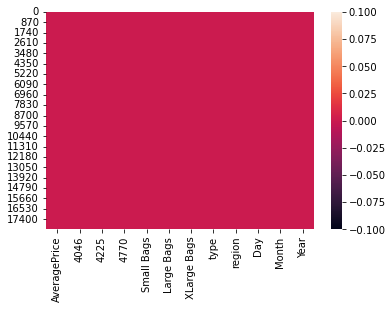

In [18]:
sns.heatmap(df.isnull())   #check null values by visual

No null values present in dataset

In [19]:
type(df)   #check dataset type

pandas.core.frame.DataFrame

# Unique values

In [20]:
df['type'].unique()  #check unique values in type variable

array(['conventional', 'organic'], dtype=object)

Only 2 type values conventional and organic 

<AxesSubplot:xlabel='type', ylabel='count'>

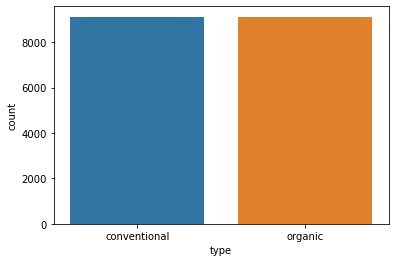

In [21]:
sns.countplot(df.type)

Both quanity of avocado is use in all region

In [22]:
df['region'].unique()  #check unique values in region variable

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

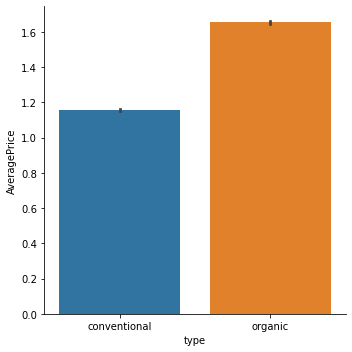

In [23]:
sns.catplot(x='type',y='AveragePrice',kind='bar',data=df)

The price of organic avogado is more compare to conventional type avogado.

# Apply encoder method

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le=LabelEncoder()

In [26]:
list1=['type','region']
for i in list1:
    df[i]=le.fit_transform(df[i].astype(str))

In [27]:
df

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region,Day,Month,Year
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,0,27,12,2015
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0,0,20,12,2015
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0,0,13,12,2015
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,0,6,12,2015
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0,0,29,11,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0,1,53,4,2,2018
18245,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0,1,53,28,1,2018
18246,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0,1,53,21,1,2018
18247,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0,1,53,14,1,2018


In [28]:
df.info()  #check information after apply encodeding method

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   4046          18249 non-null  float64
 2   4225          18249 non-null  float64
 3   4770          18249 non-null  float64
 4   Small Bags    18249 non-null  float64
 5   Large Bags    18249 non-null  float64
 6   XLarge Bags   18249 non-null  float64
 7   type          18249 non-null  int32  
 8   region        18249 non-null  int32  
 9   Day           18249 non-null  int64  
 10  Month         18249 non-null  int64  
 11  Year          18249 non-null  int64  
dtypes: float64(7), int32(2), int64(3)
memory usage: 1.5 MB


no object and null values peresent

# Statistic of Dataset

In [29]:
df.describe()  #check statistic of avocada

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region,Day,Month,Year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,2.930084e+05,2.951546e+05,2.283974e+04,1.821947e+05,5.433809e+04,3106.426507,0.499918,26.495644,15.662612,6.177215,2016.147899
std,0.402677,1.264989e+06,1.204120e+06,1.074641e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,15.583788,8.776281,3.534130,0.939938
min,0.440000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,2015.000000
25%,1.100000,8.540700e+02,3.008780e+03,0.000000e+00,2.849420e+03,1.274700e+02,0.000000,0.000000,13.000000,8.000000,3.000000,2015.000000
50%,1.370000,8.645300e+03,2.906102e+04,1.849900e+02,2.636282e+04,2.647710e+03,0.000000,0.000000,26.000000,16.000000,6.000000,2016.000000
75%,1.660000,1.110202e+05,1.502069e+05,6.243420e+03,8.333767e+04,2.202925e+04,132.500000,1.000000,40.000000,23.000000,9.000000,2017.000000
max,3.250000,2.274362e+07,2.047057e+07,2.546439e+06,1.338459e+07,5.719097e+06,551693.650000,1.000000,53.000000,31.000000,12.000000,2018.000000


Better under stand statistic plot heatmap

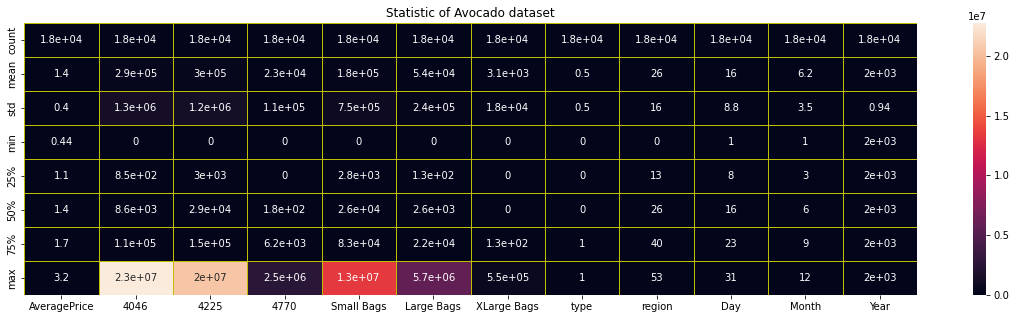

In [30]:
plt.figure(figsize=(20,5))
sns.heatmap(df.describe(),annot=True,linewidth=1,linecolor='y')
plt.title('Statistic of Avocado dataset')
plt.savefig('Statistic of Avocado dataset')
plt.show()

# Check Outliers-Box Plot

In [31]:
col=df.columns
ncol=6
nrow=15

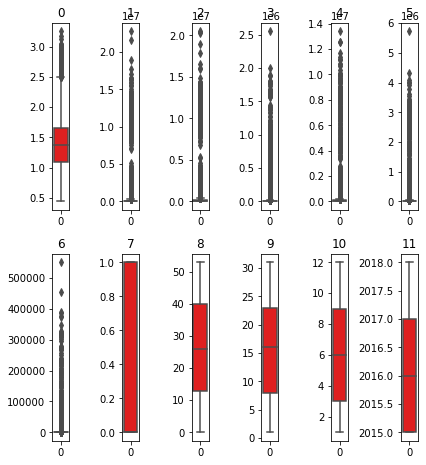

In [32]:
plt.figure(figsize=(ncol,8*ncol))
for i in range(len(col)):
    plt.subplot(nrow,ncol,i+1)
    plt.title(i)
    sns.boxplot(data=df[col[i]],color='r',orient='v')
    plt.savefig('Outliers of dataset Avocado')
    plt.tight_layout()

Outliers are present in Average_price,4046,4225,4770,Small_bags,Large_bags,Xlarge_bags.

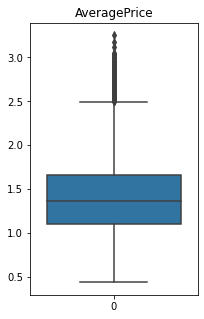

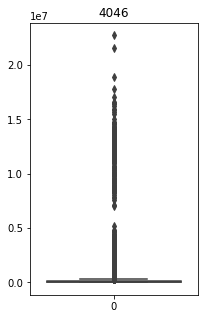

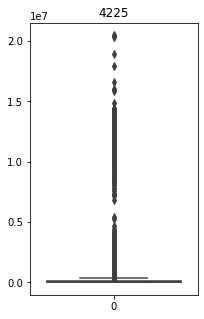

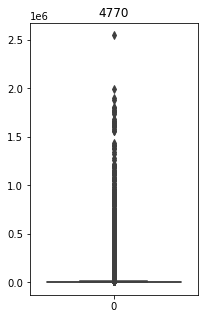

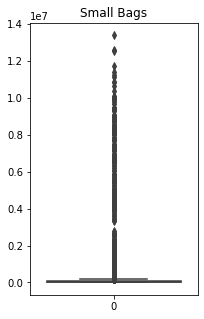

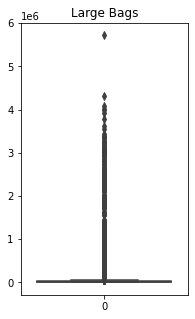

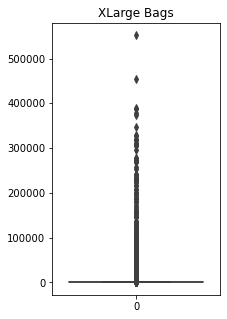

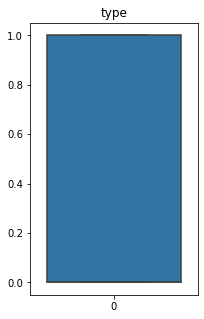

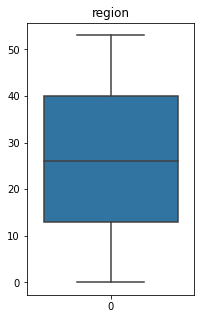

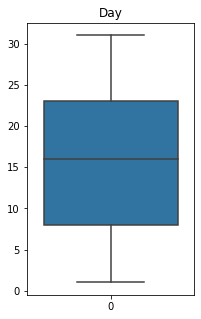

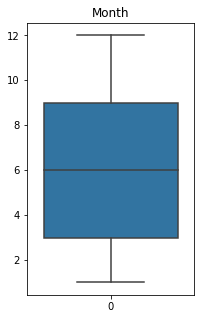

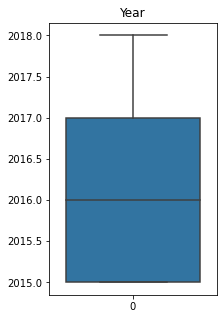

In [33]:
for i in df.columns:
    plt.figure(figsize=(3,5))
    plt.title(i)
    sns.boxplot(data=df[i])
    plt.show()

Outliers are present in Average_price,Total_volume,4046,4225,4770,Total_bags,Small_bags,Large_bags,Xlarge_bags.

# Check skewness-Distplot

<AxesSubplot:xlabel='AveragePrice', ylabel='Count'>

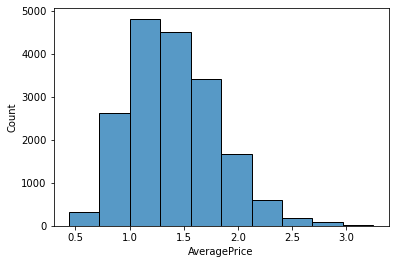

In [34]:
sns.histplot(df.AveragePrice,bins=10)

Average price of avagoda is lie between 1 to 1.7 at count 4800 avogado

<AxesSubplot:xlabel='4046', ylabel='Count'>

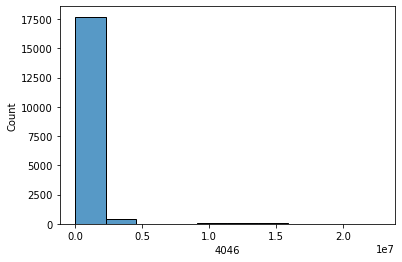

In [35]:
sns.histplot(df['4046'],bins=10)

Total sales volume of Small/Medium has Avocado  is lie between 0 to 0.45 at count 17500 and near 0.9 to 1.6 avogado is lie between 800 count

<AxesSubplot:xlabel='4225', ylabel='Count'>

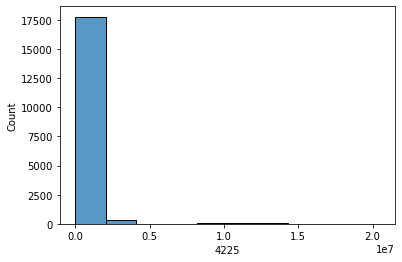

In [36]:
sns.histplot(df['4225'],bins=10)

Total sales volume of large has Avocado is 0.0 to 0.4 

<AxesSubplot:xlabel='4770', ylabel='Count'>

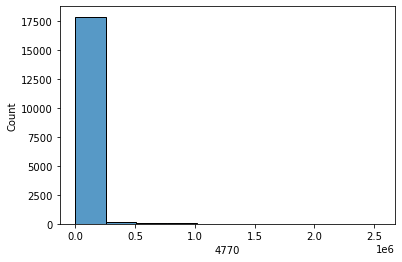

In [37]:
sns.histplot(df['4770'],bins=10)

Total sales volume of Xlarge has Avocado lie between 0.0 to 1

<AxesSubplot:xlabel='Small Bags', ylabel='Count'>

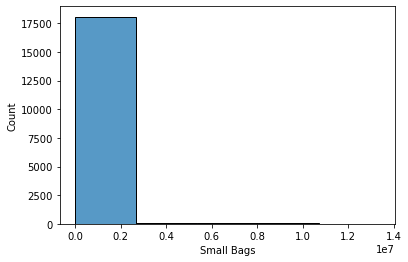

In [38]:
sns.histplot(df['Small Bags'],bins=5)

Little skewness is present in small bags

<AxesSubplot:xlabel='Large Bags', ylabel='Count'>

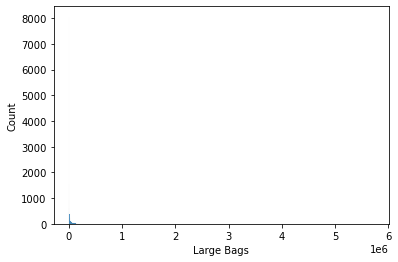

In [39]:
sns.histplot(df['Large Bags'])

Skewness is present in large bags

<AxesSubplot:xlabel='XLarge Bags', ylabel='Count'>

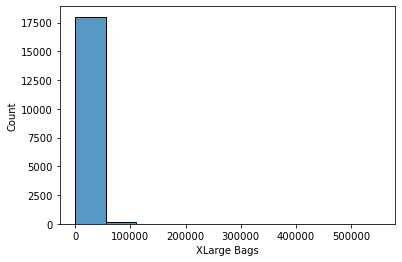

In [40]:
sns.histplot(df['XLarge Bags'],bins=10)

skewwness is present

<AxesSubplot:xlabel='type', ylabel='Density'>

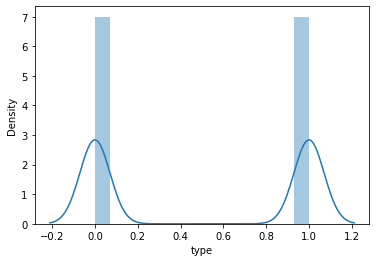

In [41]:
sns.distplot(df['type'])

in one type left skewness is present and another type right skewness is present

<AxesSubplot:xlabel='region', ylabel='Density'>

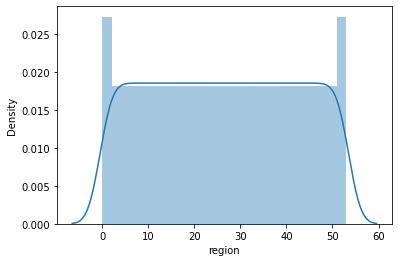

In [42]:
sns.distplot(df['region'])

Skewness is present in region variable

<AxesSubplot:xlabel='Day', ylabel='Density'>

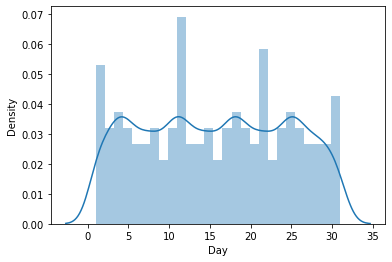

In [43]:
sns.distplot(df['Day'])

skewness is present in Day columns

<AxesSubplot:xlabel='Month', ylabel='Density'>

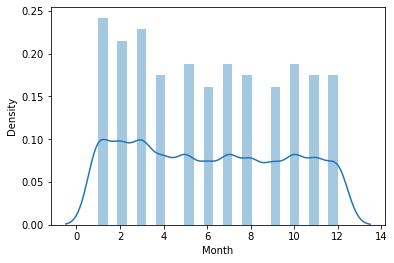

In [44]:
sns.distplot(df['Month'])

skewness is present 

<AxesSubplot:xlabel='Year', ylabel='Density'>

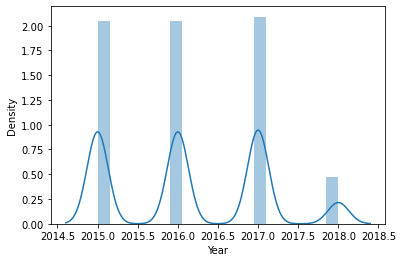

In [45]:
sns.distplot(df['Year'])

right side type skewness is pressent in year

# SCATTER PLOT-Target variable-->AveragePrice

<AxesSubplot:xlabel='AveragePrice', ylabel='region'>

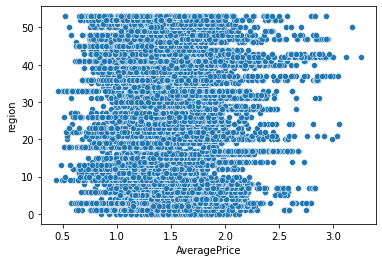

In [46]:
sns.scatterplot(data=df,x='AveragePrice',y='region')

As region changes it affect avagado price.

<AxesSubplot:xlabel='4046', ylabel='region'>

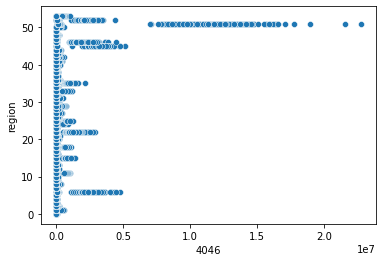

In [47]:
sns.scatterplot(data=df,x='4046',y='region')

As region changes it affect Total number of avocados with PLU 4046 sold units

<AxesSubplot:xlabel='4225', ylabel='region'>

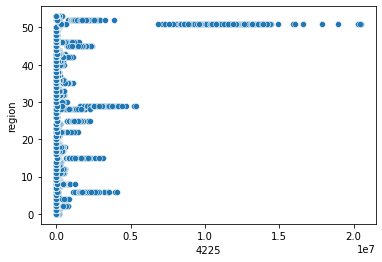

In [48]:
sns.scatterplot(data=df,x='4225',y='region')

region change Avocado sold unit plu 4225 changes

<AxesSubplot:xlabel='4770', ylabel='region'>

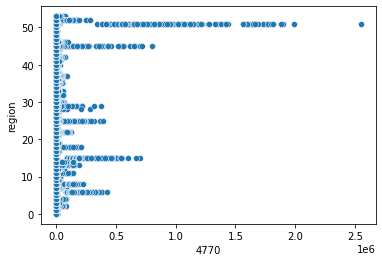

In [49]:
sns.scatterplot(data=df,x='4770',y='region')

Region change Avocado sold unit plu 4770 changes

<AxesSubplot:xlabel='Small Bags', ylabel='region'>

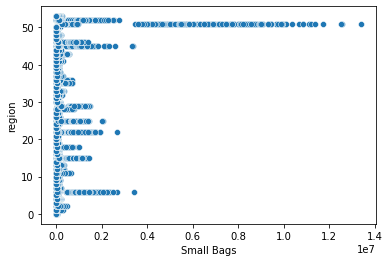

In [50]:
sns.scatterplot(data=df,x='Small Bags',y='region')

in region if avocado sell less wwhere small bags are useing

<AxesSubplot:xlabel='Large Bags', ylabel='region'>

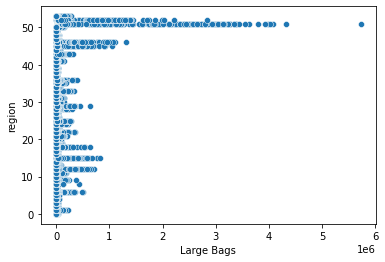

In [51]:
sns.scatterplot(data=df,x='Large Bags',y='region')

near region 50 high selling then large bags are using

<AxesSubplot:xlabel='type', ylabel='region'>

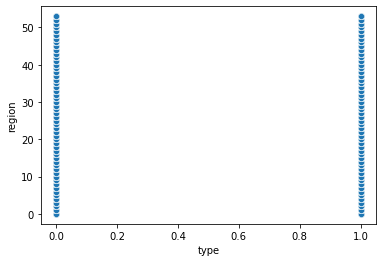

In [52]:
sns.scatterplot(data=df,x='type',y='region')

in region both type conventional and organic type avocado sell

# Check Correlation Between Dataset Variable

In [53]:
df.corr()   #check corelation between dataset variable

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region,Day,Month,Year
AveragePrice,1.000000,-0.208317,-0.172928,-0.179446,-0.174730,-0.172940,-0.117592,0.615845,-0.011716,0.027386,0.162409,0.093197
4046,-0.208317,1.000000,0.926110,0.833389,0.925280,0.838645,0.699377,-0.225819,0.192073,-0.010159,-0.025803,0.003353
4225,-0.172928,0.926110,1.000000,0.887855,0.916031,0.810015,0.688809,-0.232289,0.145726,-0.012393,-0.022108,-0.009559
4770,-0.179446,0.833389,0.887855,1.000000,0.802733,0.698471,0.679861,-0.210027,0.095252,-0.009009,-0.033424,-0.036531
Small Bags,-0.174730,0.925280,0.916031,0.802733,1.000000,0.902589,0.806845,-0.220535,0.164702,-0.003870,-0.023126,0.063915
Large Bags,-0.172940,0.838645,0.810015,0.698471,0.902589,1.000000,0.710858,-0.193177,0.198768,-0.008352,-0.020187,0.087891
XLarge Bags,-0.117592,0.699377,0.688809,0.679861,0.806845,0.710858,1.000000,-0.175483,0.082281,0.000319,-0.012969,0.081033
type,0.615845,-0.225819,-0.232289,-0.210027,-0.220535,-0.193177,-0.175483,1.000000,-0.000280,-0.000013,-0.000085,-0.000032
region,-0.011716,0.192073,0.145726,0.095252,0.164702,0.198768,0.082281,-0.000280,1.000000,-0.000021,-0.000144,-0.000055
Day,0.027386,-0.010159,-0.012393,-0.009009,-0.003870,-0.008352,0.000319,-0.000013,-0.000021,1.000000,0.010621,0.004475


<AxesSubplot:>

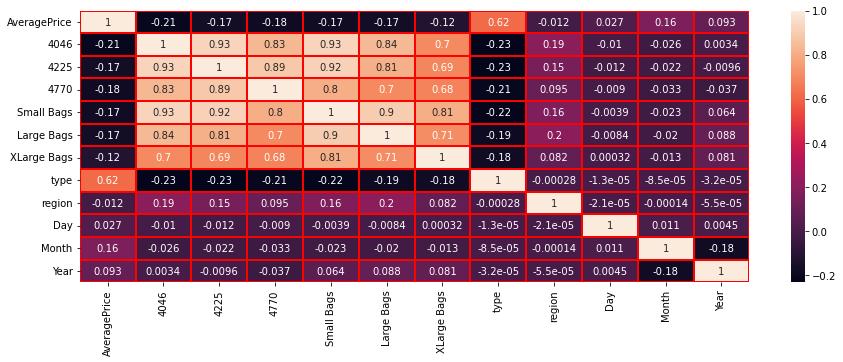

In [54]:
plt.figure(figsize=(15,5))  #better understand correlation plot diagrame
sns.heatmap(df.corr(),annot=True,linewidth=2,linecolor='r')

Observation-->
1. 4046 correlated with target Average Price is -21%.It is good bond.
2. 4225 correlated with target Average Price is -17%.It is good bond.
3. 4770 correlated with target Average Price is -18%.It is good bond.
4.Small Bags correlated with target Average Price is -17%.It is good bond.
5.Large Bags correlated with target Average Price is -17%.It is good bond.
6.XLarge Bags correlated with target Average Price is -12%.It is good bond.
7.Type correlated with target Average Price is 62%.It is very strong bond.
8.Region correlated with target Average Price is -1.2%.It is poor bond.
9.Day correlated with target Average Price is 2.7.It is poor bond.
10.Month correlated with target Average Price is 16%.It is good bond.
11.Year correlated with target Average Price is 9.3%.It is good bond.

Region is very less correlated with average price, so we drop it

In [56]:
df=df.drop('region',axis=1)

# Check Outliers

In [57]:
from scipy.stats import zscore    #import zscore libary for check outliers

In [58]:
(np.abs(zscore(df))<3).all().all()   #check outliers are prsent or not in dataset

False

outliers are present in dataset

In [59]:
(np.abs(zscore(df))<3).all()  #check outliers in dataset particular columns

AveragePrice    False
4046            False
4225            False
4770            False
Small Bags      False
Large Bags      False
XLarge Bags     False
type             True
Day              True
Month            True
Year             True
dtype: bool

Outliers are present in AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags

In [60]:
df1=df.drop(['4046','4225','4770','Small Bags','Large Bags','XLarge Bags'],axis=1)

sepearte categorial type data and whoes outliers are not present

In [59]:
type(df1)  #type check df1

pandas.core.frame.DataFrame

In [61]:
df2=df.drop(['AveragePrice','type','Day','Month','Year'],axis=1)
df2

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags
0,1036.74,54454.85,48.16,8603.62,93.25,0.0
1,674.28,44638.81,58.33,9408.07,97.49,0.0
2,794.70,109149.67,130.50,8042.21,103.14,0.0
3,1132.00,71976.41,72.58,5677.40,133.76,0.0
4,941.48,43838.39,75.78,5986.26,197.69,0.0
...,...,...,...,...,...,...
18244,2046.96,1529.20,0.00,13066.82,431.85,0.0
18245,1191.70,3431.50,0.00,8940.04,324.80,0.0
18246,1191.92,2452.79,727.94,9351.80,42.31,0.0
18247,1527.63,2981.04,727.01,10919.54,50.00,0.0


In [62]:
type(df2)   #type check df2

pandas.core.frame.DataFrame

In [63]:
z=(np.abs(zscore(df2))<3).all()  #outliers present in some columns
z

4046           False
4225           False
4770           False
Small Bags     False
Large Bags     False
XLarge Bags    False
dtype: bool

# Apply IQR METHOD

In [64]:
q1=df2.quantile(0.25)   #apply iqr method on 0.25 %data
q1

4046            854.07
4225           3008.78
4770              0.00
Small Bags     2849.42
Large Bags      127.47
XLarge Bags       0.00
Name: 0.25, dtype: float64

In [65]:
q2=df2.quantile(0.75)   #apply iqr method on 0.75% data
q2

4046           111020.20
4225           150206.86
4770             6243.42
Small Bags      83337.67
Large Bags      22029.25
XLarge Bags       132.50
Name: 0.75, dtype: float64

In [66]:
iqr=q2-q1  #get 50%data values

In [67]:
upper=q2+(iqr*1.5)
lower=q1-(iqr*1.5)

In [68]:
df2=df2[(df2>lower) & (df2<upper)]
df2

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags
0,1036.74,54454.85,48.16,8603.62,93.25,0.0
1,674.28,44638.81,58.33,9408.07,97.49,0.0
2,794.70,109149.67,130.50,8042.21,103.14,0.0
3,1132.00,71976.41,72.58,5677.40,133.76,0.0
4,941.48,43838.39,75.78,5986.26,197.69,0.0
...,...,...,...,...,...,...
18244,2046.96,1529.20,0.00,13066.82,431.85,0.0
18245,1191.70,3431.50,0.00,8940.04,324.80,0.0
18246,1191.92,2452.79,727.94,9351.80,42.31,0.0
18247,1527.63,2981.04,727.01,10919.54,50.00,0.0


In [69]:
df2.isnull().sum()  #check null values after outliers removal by iqr method

4046           2518
4225           2519
4770           2918
Small Bags     2407
Large Bags     2707
XLarge Bags    4014
dtype: int64

In [70]:
from sklearn.impute import SimpleImputer   #import null values remove liabary

In [71]:
imp=SimpleImputer(strategy='median')  #data int form so use mean/median

In [72]:
for i in df2.columns:
    df2[i]=imp.fit_transform(df2[i].values.reshape(-1,1))
    

In [73]:
df2.isnull().sum()  #check after remove null values

4046           0
4225           0
4770           0
Small Bags     0
Large Bags     0
XLarge Bags    0
dtype: int64

# Check Skewness in Both df1 and df2 frame

In [74]:
df1.skew()  #check skewness in df1 frame

AveragePrice    0.580303
type            0.000329
Day             0.014310
Month           0.106617
Year            0.215339
dtype: float64

In [75]:
df2.skew()  #check skewness in df2 frame

4046           2.115606
4225           2.169585
4770           2.689417
Small Bags     1.718893
Large Bags     2.347949
XLarge Bags    5.125288
dtype: float64

In [76]:
from sklearn.preprocessing import power_transform

In [77]:
df3=power_transform(df2)

In [78]:
type(df3)

numpy.ndarray

In [79]:
df4=pd.DataFrame(data=df3,columns=df2.columns)
df4

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags
0,-0.591970,0.688560,0.022006,-0.298929,-0.785469,-0.368851
1,-0.735335,0.572058,0.080950,-0.251724,-0.773948,-0.368851
2,-0.681259,1.124971,0.327406,-0.333972,-0.759239,-0.368851
3,-0.561953,0.858121,0.148089,-0.506960,-0.689745,-0.368851
4,-0.624598,0.561627,0.161325,-0.481468,-0.580174,-0.368851
...,...,...,...,...,...,...
18244,-0.353093,-0.951431,-1.263171,-0.070253,-0.341454,-0.368851
18245,-0.544289,-0.654284,-1.263171,-0.278783,-0.431614,-0.368851
18246,-0.544225,-0.782186,0.841449,-0.254920,-0.977680,-0.368851
18247,-0.457723,-0.708686,0.841074,-0.171004,-0.939012,-0.368851


In [80]:
df4.skew()

4046          -0.049546
4225          -0.074888
4770           0.033847
Small Bags    -0.129272
Large Bags    -0.153447
XLarge Bags    2.344622
dtype: float64

Skewness not remove of XLarge Bags then we do 2nd times

In [81]:
df5=power_transform(df4)

In [82]:
df2=pd.DataFrame(data=df5,columns=df2.columns)

In [83]:
df2.skew()

4046          -0.048685
4225          -0.008524
4770           0.036427
Small Bags    -0.009815
Large Bags     0.014380
XLarge Bags    2.341232
dtype: float64

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

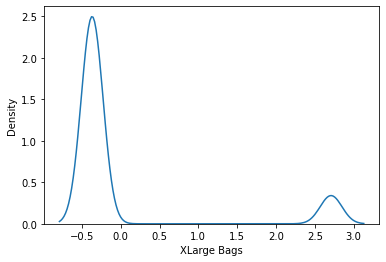

In [84]:
sns.kdeplot(df2['XLarge Bags'])

After do 2nd time it is not come in range,so we try another method on it

In [85]:
 df2['XLarge Bags']=np.log( df2['XLarge Bags'])  #apply log transform method 

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

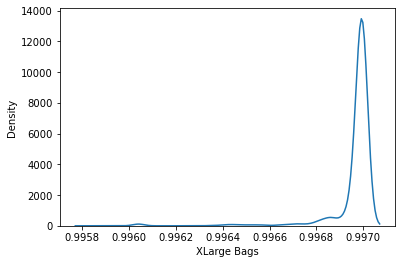

In [86]:
sns.kdeplot( df2['XLarge Bags'])

In [87]:
 df2['XLarge Bags'].skew()

-5.677446448072223

after apply log transform method same condition so we remove it

In [88]:
df2=df2.drop( ['XLarge Bags'],axis=1)

In [89]:
ds=pd.concat([df1,df2],axis=1)
ds

,AveragePrice,type,Day,Month,Year,4046,4225,4770,Small Bags,Large Bags
0,1.33,0,27,12,2015,-0.592105,0.681234,0.020754,-0.331969,-0.803508
1,1.35,0,20,12,2015,-0.735425,0.561912,0.079707,-0.285844,-0.792850
2,0.93,0,13,12,2015,-0.681367,1.131551,0.326313,-0.366099,-0.779230
3,1.08,0,6,12,2015,-0.562097,0.855604,0.146870,-0.533293,-0.714662
4,1.28,0,29,11,2015,-0.624723,0.551248,0.160111,-0.508784,-0.612095
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,1,4,2,2018,-0.353285,-0.952172,-1.262398,-0.106804,-0.385055
18245,1.71,1,28,1,2018,-0.544437,-0.663188,-1.262398,-0.312306,-0.471419
18246,1.87,1,21,1,2018,-0.544374,-0.787859,0.841146,-0.288973,-0.979943
18247,1.93,1,14,1,2018,-0.457893,-0.716271,0.840770,-0.206557,-0.944649


# TARGET-->AVERAGE PRICE

In [90]:
x=ds.drop('AveragePrice',axis=1)  #drop target variable for do independent data

In [91]:
y=ds.AveragePrice  #separte target vriable into 

# Apply Standard Scaler

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
st=StandardScaler()

In [94]:
x=st.fit_transform(x)
x

array([[-0.99983562,  1.29185687,  1.64763162, ...,  0.02075428,
        -0.33196938, -0.80350817],
       [-0.99983562,  0.49423066,  1.64763162, ...,  0.07970676,
        -0.28584448, -0.79285015],
       [-0.99983562, -0.30339555,  1.64763162, ...,  0.32631253,
        -0.36609911, -0.77923005],
       ...,
       [ 1.00016441,  0.60817726, -1.46495942, ...,  0.84114589,
        -0.28897338, -0.97994299],
       [ 1.00016441, -0.18944895, -1.46495942, ...,  0.84077003,
        -0.20655697, -0.94464873],
       [ 1.00016441, -0.98707516, -1.46495942, ...,  0.49079086,
        -0.15527189, -1.07695105]])

# Apply train test split method with diffrent models

In [95]:
LI=LinearRegression()
DT=DecisionTreeRegressor()
SV=SVR()
KN=KNeighborsRegressor()
LA=Lasso()
RI=Ridge()
AD=AdaBoostRegressor()
GB=GradientBoostingRegressor()
RF=RandomForestRegressor()

# Model=LINEAR REGRESSOR

In [96]:
max_acc=0
max_rand=0

for i in range(0,40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    LI.fit(x_train,y_train)
    pred=LI.predict(x_test)
    test_acc=r2_score(y_test,pred)*100
    print(f"(At random_state {i},the accuracy is {test_acc})")
          
    if test_acc>max_acc:
          max_acc=test_acc
          max_rand=i
          print('Max accuracy',max_acc,'Max_Random_state',i)
          print('\n')   

(At random_state 0,the accuracy is 46.84650246554156)
Max accuracy 46.84650246554156 Max_Random_state 0


(At random_state 1,the accuracy is 46.278664954824876)
(At random_state 2,the accuracy is 44.937983713797244)
(At random_state 3,the accuracy is 46.210191314771485)
(At random_state 4,the accuracy is 45.273299120028675)
(At random_state 5,the accuracy is 45.80838075163967)
(At random_state 6,the accuracy is 46.44088297019637)
(At random_state 7,the accuracy is 46.29111203398989)
(At random_state 8,the accuracy is 45.397901045921664)
(At random_state 9,the accuracy is 44.58514254428814)
(At random_state 10,the accuracy is 45.95524340915629)
(At random_state 11,the accuracy is 46.653417237578445)
(At random_state 12,the accuracy is 46.76467366436731)
(At random_state 13,the accuracy is 44.670931809021695)
(At random_state 14,the accuracy is 46.3743444963296)
(At random_state 15,the accuracy is 44.44109420569936)
(At random_state 16,the accuracy is 45.6209591835919)
(At random_state 1

At random state 27 model give accuracy 47.45%

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=27)
LI.fit(x_train,y_train)
pred=LI.predict(x_test)
print(f"Mean_Absolute_Error= {mean_absolute_error(y_test,pred)}")
print(f"Mean_Squared_Error= {mean_squared_error(y_test,pred)}")
print(f"Root_Mean_Absolute_Error= {np.sqrt(mean_squared_error(y_test,pred))}")
print(f"R2_Score= {r2_score(y_test,pred)*100}")
print(f"Model_With_Dataset={LI.score(x_train,y_train)*100}")

Mean_Absolute_Error= 0.2270416176138164
Mean_Squared_Error= 0.08520423577339022
Root_Mean_Absolute_Error= 0.29189764605661045
R2_Score= 47.45164793188259
Model_With_Dataset=45.6969770321112


In the linear regression, model accuracy has come to 47.50 is very low and the error percentage is very less.
we try another method for getting a better result

 # Model= RIDGE 

In [98]:
max_acc=0
max_rand=0

for i in range(0,40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    RI.fit(x_train,y_train)
    pred=RI.predict(x_test)
    test_acc=r2_score(y_test,pred)*100
    print(f"(At random_state {i},the accuracy is {test_acc})")
          
    if test_acc>max_acc:
          max_acc=test_acc
          max_rand=i
          print('Max accuracy',max_acc,'Max_Random_state',i)
          print('\n')   

(At random_state 0,the accuracy is 46.8462677614487)
Max accuracy 46.8462677614487 Max_Random_state 0


(At random_state 1,the accuracy is 46.278721644109176)
(At random_state 2,the accuracy is 44.93805468224493)
(At random_state 3,the accuracy is 46.210170883505874)
(At random_state 4,the accuracy is 45.27320778160677)
(At random_state 5,the accuracy is 45.808369798952796)
(At random_state 6,the accuracy is 46.44106539452737)
(At random_state 7,the accuracy is 46.2910423488036)
(At random_state 8,the accuracy is 45.39831266383051)
(At random_state 9,the accuracy is 44.58516407703726)
(At random_state 10,the accuracy is 45.95515876911682)
(At random_state 11,the accuracy is 46.65346278798819)
(At random_state 12,the accuracy is 46.76465766294806)
(At random_state 13,the accuracy is 44.67097869825667)
(At random_state 14,the accuracy is 46.37393037028617)
(At random_state 15,the accuracy is 44.44131700760974)
(At random_state 16,the accuracy is 45.62117014148426)
(At random_state 17,the

At random state 27 model give accuracy is 47.45%

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=27)
RI.fit(x_train,y_train)
pred=RI.predict(x_test)
print(f"Mean_Absolute_Error= {mean_absolute_error(y_test,pred)}")
print(f"Mean_Squared_Error= {mean_squared_error(y_test,pred)}")
print(f"Root_Mean_Absolute_Error= {np.sqrt(mean_squared_error(y_test,pred))}")
print(f"R2_Score= {r2_score(y_test,pred)*100}")
print(f"Model_With_Dataset={RI.score(x_train,y_train)*100}")

Mean_Absolute_Error= 0.22704124739940665
Mean_Squared_Error= 0.08520428036639684
Root_Mean_Absolute_Error= 0.2918977224412634
R2_Score= 47.45162042985772
Model_With_Dataset=45.696976531785225


It is a little bit better than linear regression

# Model=Decision Tree Regressor

In [100]:
max_acc=0
max_rand=0

for i in range(0,40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    DT.fit(x_train,y_train)
    pred=DT.predict(x_test)
    test_acc=r2_score(y_test,pred)*100
    print(f"(At random_state {i},the accuracy is {test_acc})")
          
    if test_acc>max_acc:
          max_acc=test_acc
          max_rand=i
          print('Max accuracy',max_acc,'Max_Random_state',i)
          print('\n')   

(At random_state 0,the accuracy is 69.83724768076848)
Max accuracy 69.83724768076848 Max_Random_state 0


(At random_state 1,the accuracy is 68.87419060738993)
(At random_state 2,the accuracy is 67.9860584990377)
(At random_state 3,the accuracy is 70.07745741910813)
Max accuracy 70.07745741910813 Max_Random_state 3


(At random_state 4,the accuracy is 66.98967629183407)
(At random_state 5,the accuracy is 70.45021943557599)
Max accuracy 70.45021943557599 Max_Random_state 5


(At random_state 6,the accuracy is 70.38904767895633)
(At random_state 7,the accuracy is 68.64481260804227)
(At random_state 8,the accuracy is 70.88892624078305)
Max accuracy 70.88892624078305 Max_Random_state 8


(At random_state 9,the accuracy is 69.42374531979404)
(At random_state 10,the accuracy is 68.78112605380247)
(At random_state 11,the accuracy is 69.5527355745724)
(At random_state 12,the accuracy is 69.05176832992139)
(At random_state 13,the accuracy is 68.3429294655176)
(At random_state 14,the accuracy is

At random state 26 model give accuracy 72.26%

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=26)
DT.fit(x_train,y_train)
pred=DT.predict(x_test)
print(f"Mean_Absolute_Error= {mean_absolute_error(y_test,pred)}")
print(f"Mean_Squared_Error= {mean_squared_error(y_test,pred)}")
print(f"Root_Mean_Absolute_Error= {np.sqrt(mean_squared_error(y_test,pred))}")
print(f"R2_Score= {r2_score(y_test,pred)*100}")
print(f"Model_With_Dataset={DT.score(x_train,y_train)*100}")

Mean_Absolute_Error= 0.1425067188519243
Mean_Squared_Error= 0.04640102291359923
Root_Mean_Absolute_Error= 0.2154089666508784
R2_Score= 71.92224207746366
Model_With_Dataset=99.47599041392935


In the decision tree regression, model accuracy has come to 76.52%  is good  and the error percentage is 
very less compare to prevoius models.
we try another method for getting a better result

# Model=SVR

In [102]:
max_acc=0
max_rand=0

for i in range(0,40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    SV.fit(x_train,y_train)
    pred=SV.predict(x_test)
    test_acc=r2_score(y_test,pred)*100
    print(f"(At random_state {i},the accuracy is {test_acc})")
          
    if test_acc>max_acc:
          max_acc=test_acc
          max_rand=i
          print('Max accuracy',max_acc,'Max_Random_state',i)
          print('\n')   

(At random_state 0,the accuracy is 75.11303046436228)
Max accuracy 75.11303046436228 Max_Random_state 0


(At random_state 1,the accuracy is 74.28537008269194)
(At random_state 2,the accuracy is 74.97154086010067)
(At random_state 3,the accuracy is 75.09383182386283)
(At random_state 4,the accuracy is 73.09346723706426)
(At random_state 5,the accuracy is 74.97610377398959)
(At random_state 6,the accuracy is 74.15512029756626)
(At random_state 7,the accuracy is 75.28975092316257)
Max accuracy 75.28975092316257 Max_Random_state 7


(At random_state 8,the accuracy is 74.37423433637689)
(At random_state 9,the accuracy is 73.50093453528619)
(At random_state 10,the accuracy is 73.53013597528724)
(At random_state 11,the accuracy is 75.3574891565432)
Max accuracy 75.3574891565432 Max_Random_state 11


(At random_state 12,the accuracy is 74.79366389401712)
(At random_state 13,the accuracy is 73.87732919614969)
(At random_state 14,the accuracy is 74.433044869106)
(At random_state 15,the accuracy

In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=29)
SV.fit(x_train,y_train)
pred=SV.predict(x_test)
print(f"Mean_Absolute_Error= {mean_absolute_error(y_test,pred)}")
print(f"Mean_Squared_Error= {mean_squared_error(y_test,pred)}")
print(f"Root_Mean_Absolute_Error= {np.sqrt(mean_squared_error(y_test,pred))}")
print(f"R2_Score= {r2_score(y_test,pred)*100}")
print(f"Model_With_Dataset={SV.score(x_train,y_train)*100}")

Mean_Absolute_Error= 0.1458194452006456
Mean_Squared_Error= 0.0381569161042283
Root_Mean_Absolute_Error= 0.19533795356824105
R2_Score= 76.08156124622228
Model_With_Dataset=76.12919586789594


In the support vector regression, model accuracy has come to 76.08%  is good  and the error percentage is 
very less compare to prevoius models.
we try another method for getting a better result

# Model=KNEIGHBORS REGRESSOR

In [104]:
max_acc=0
max_rand=0

for i in range(0,40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    KN.fit(x_train,y_train)
    pred=KN.predict(x_test)
    test_acc=r2_score(y_test,pred)*100
    print(f"(At random_state {i},the accuracy is {test_acc})")
          
    if test_acc>max_acc:
          max_acc=test_acc
          max_rand=i
          print('Max accuracy',max_acc,'Max_Random_state',i)
          print('\n')   

(At random_state 0,the accuracy is 76.7524916546407)
Max accuracy 76.7524916546407 Max_Random_state 0


(At random_state 1,the accuracy is 77.85415960664115)
Max accuracy 77.85415960664115 Max_Random_state 1


(At random_state 2,the accuracy is 77.37178823342012)
(At random_state 3,the accuracy is 76.80323770048763)
(At random_state 4,the accuracy is 76.17152782431796)
(At random_state 5,the accuracy is 78.61305682802163)
Max accuracy 78.61305682802163 Max_Random_state 5


(At random_state 6,the accuracy is 78.13731241428911)
(At random_state 7,the accuracy is 77.64710533669046)
(At random_state 8,the accuracy is 76.1222200220676)
(At random_state 9,the accuracy is 76.68958400517182)
(At random_state 10,the accuracy is 77.62586651226601)
(At random_state 11,the accuracy is 77.34856774106305)
(At random_state 12,the accuracy is 76.93217054731313)
(At random_state 13,the accuracy is 77.29973614443875)
(At random_state 14,the accuracy is 77.55627192198233)
(At random_state 15,the accuracy

At random state 5 model give accuracy 78.61%

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=5)
KN.fit(x_train,y_train)
pred=KN.predict(x_test)
print(f"Mean_Absolute_Error= {mean_absolute_error(y_test,pred)}")
print(f"Mean_Squared_Error= {mean_squared_error(y_test,pred)}")
print(f"Root_Mean_Absolute_Error= {np.sqrt(mean_squared_error(y_test,pred))}")
print(f"R2_Score= {r2_score(y_test,pred)*100}")
print(f"Model_With_Dataset={KN.score(x_train,y_train)*100}")

Mean_Absolute_Error= 0.13681424657534247
Mean_Squared_Error= 0.0344086202739726
Root_Mean_Absolute_Error= 0.18549560715545962
R2_Score= 78.61305682802163
Model_With_Dataset=85.0804211672508


In thekneighbors regression, model accuracy has come to 78.61%  is good  and the error percentage is 
very less compare to prevoius models.
we try another method for getting a better result

# Model-ADA BOOST REGRESSOR

In [106]:
max_acc=0
max_rand=0

for i in range(0,40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    AD.fit(x_train,y_train)
    pred=AD.predict(x_test)
    test_acc=r2_score(y_test,pred)*100
    print(f"(At random_state {i},the accuracy is {test_acc})")
          
    if test_acc>max_acc:
          max_acc=test_acc
          max_rand=i
          print('Max accuracy',max_acc,'Max_Random_state',i)
          print('\n')   

(At random_state 0,the accuracy is 55.48630256545613)
Max accuracy 55.48630256545613 Max_Random_state 0


(At random_state 1,the accuracy is 55.28803561864686)
(At random_state 2,the accuracy is 54.9238619065989)
(At random_state 3,the accuracy is 53.69605748393327)
(At random_state 4,the accuracy is 52.9037251536716)
(At random_state 5,the accuracy is 54.753730159751136)
(At random_state 6,the accuracy is 56.63917580378814)
Max accuracy 56.63917580378814 Max_Random_state 6


(At random_state 7,the accuracy is 55.50381812398676)
(At random_state 8,the accuracy is 52.87794185305725)
(At random_state 9,the accuracy is 54.7052963824352)
(At random_state 10,the accuracy is 54.36949744755493)
(At random_state 11,the accuracy is 54.60829392658477)
(At random_state 12,the accuracy is 55.62041405495768)
(At random_state 13,the accuracy is 52.92501413372474)
(At random_state 14,the accuracy is 54.4206300405714)
(At random_state 15,the accuracy is 52.69209158887212)
(At random_state 16,the accur

At random state 37 model give accuracy 57.36%

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=37)
AD.fit(x_train,y_train)
pred=AD.predict(x_test)
print(f"Mean_Absolute_Error= {mean_absolute_error(y_test,pred)}")
print(f"Mean_Squared_Error= {mean_squared_error(y_test,pred)}")
print(f"Root_Mean_Absolute_Error= {np.sqrt(mean_squared_error(y_test,pred))}")
print(f"R2_Score= {r2_score(y_test,pred)*100}")
print(f"Model_With_Dataset={AD.score(x_train,y_train)*100}")

Mean_Absolute_Error= 0.21219733139293143
Mean_Squared_Error= 0.0707039903374138
Root_Mean_Absolute_Error= 0.26590221950448967
R2_Score= 57.803943315927576
Model_With_Dataset=55.70045161779669


In the ada boost regression, model accuracy has come to 57.80%  is less  and the error percentage is 
high compare to prevoius models.
So,we try another method for getting a better result

# Model=GRADIENT BOOSTING REGRESSOR

In [108]:
max_acc=0
max_rand=0

for i in range(0,40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    GB.fit(x_train,y_train)
    pred=GB.predict(x_test)
    test_acc=r2_score(y_test,pred)*100
    print(f"(At random_state {i},the accuracy is {test_acc})")
          
    if test_acc>max_acc:
          max_acc=test_acc
          max_rand=i
          print('Max accuracy',max_acc,'Max_Random_state',i)
          print('\n')   

(At random_state 0,the accuracy is 70.30538195771896)
Max accuracy 70.30538195771896 Max_Random_state 0


(At random_state 1,the accuracy is 70.01044274307847)
(At random_state 2,the accuracy is 70.3250287006795)
Max accuracy 70.3250287006795 Max_Random_state 2


(At random_state 3,the accuracy is 70.40585541050652)
Max accuracy 70.40585541050652 Max_Random_state 3


(At random_state 4,the accuracy is 69.07495198213202)
(At random_state 5,the accuracy is 70.33920370987931)
(At random_state 6,the accuracy is 70.48717375137797)
Max accuracy 70.48717375137797 Max_Random_state 6


(At random_state 7,the accuracy is 70.55459060898892)
Max accuracy 70.55459060898892 Max_Random_state 7


(At random_state 8,the accuracy is 70.80334690251415)
Max accuracy 70.80334690251415 Max_Random_state 8


(At random_state 9,the accuracy is 69.33997331795965)
(At random_state 10,the accuracy is 70.1486857276905)
(At random_state 11,the accuracy is 70.08845413455114)
(At random_state 12,the accuracy is 70.14

At random state 29 model give accuracy 71.33%

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=29)
GB.fit(x_train,y_train)
pred=GB.predict(x_test)
print(f"Mean_Absolute_Error= {mean_absolute_error(y_test,pred)}")
print(f"Mean_Squared_Error= {mean_squared_error(y_test,pred)}")
print(f"Root_Mean_Absolute_Error= {np.sqrt(mean_squared_error(y_test,pred))}")
print(f"R2_Score= {r2_score(y_test,pred)*100}")
print(f"Model_With_Dataset={GB.score(x_train,y_train)*100}")

Mean_Absolute_Error= 0.16471625287038671
Mean_Squared_Error= 0.04573151138472741
Root_Mean_Absolute_Error= 0.2138492725840502
R2_Score= 71.33347068234164
Model_With_Dataset=70.76280315317584


In the gradient boosting regressor, model accuracy has come to 71.33%  is good  and the error percentage is 
very less compare to prevoius models.
we try another method for getting a better result

# Model=RANDOM FOREST REGRESSOR

In [110]:
max_acc=0
max_rand=0

for i in range(0,40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    RF.fit(x_train,y_train)
    pred=RF.predict(x_test)
    test_acc=r2_score(y_test,pred)*100
    print(f"(At random_state {i},the accuracy is {test_acc})")
          
    if test_acc>max_acc:
          max_acc=test_acc
          max_rand=i
          print('Max accuracy',max_acc,'Max_Random_state',i)
          print('\n')   

(At random_state 0,the accuracy is 84.8348257625902)
Max accuracy 84.8348257625902 Max_Random_state 0


(At random_state 1,the accuracy is 85.88478311068661)
Max accuracy 85.88478311068661 Max_Random_state 1


(At random_state 2,the accuracy is 84.67101464983656)
(At random_state 3,the accuracy is 85.53907792044988)
(At random_state 4,the accuracy is 84.51367882932507)
(At random_state 5,the accuracy is 85.35588054316507)
(At random_state 6,the accuracy is 86.20868333522894)
Max accuracy 86.20868333522894 Max_Random_state 6


(At random_state 7,the accuracy is 85.28138940338236)
(At random_state 8,the accuracy is 85.42735519173586)
(At random_state 9,the accuracy is 84.60330784601152)
(At random_state 10,the accuracy is 84.7746974164716)
(At random_state 11,the accuracy is 85.43828659454749)
(At random_state 12,the accuracy is 85.09397806454996)
(At random_state 13,the accuracy is 85.2126681797851)
(At random_state 14,the accuracy is 85.87781789543082)
(At random_state 15,the accuracy 

At random state 6 model give accuracy give 86.205%

In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=6)
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
print(f"Mean_Absolute_Error= {mean_absolute_error(y_test,pred)}")
print(f"Mean_Squared_Error= {mean_squared_error(y_test,pred)}")
print(f"Root_Mean_Absolute_Error= {np.sqrt(mean_squared_error(y_test,pred))}")
print(f"R2_Score= {r2_score(y_test,pred)*100}")
print(f"Model_With_Dataset={RF.score(x_train,y_train)*100}")

Mean_Absolute_Error= 0.10774596448961773
Mean_Squared_Error= 0.022246039319445153
Root_Mean_Absolute_Error= 0.14915106207950768
R2_Score= 86.21637582430249
Model_With_Dataset=97.52271348986253


In the random forest regressor, model accuracy has come to 86.21  is good  and the error percentage is 
very less compare to prevoius models.

#### we try another method for getting a better result

# Check models with another model selection method for better result

# CV_METHOD-LINEAR METHOD

In [112]:
test=LI.predict(x_test)
pred=r2_score(y_test,test)
for i in range(2,10):
    cv1 = KFold(n_splits=i, shuffle=True)
    cv_score=cross_val_score(LI,x,y,cv=cv1)
    mean_score=cv_score.mean()
    print(f'At cross fold  model {i} the mean_score is:{mean_score} and the test accuracy is {pred}')
    print('\n')   

At cross fold  model 2 the mean_score is:0.4599566105160479 and the test accuracy is 0.4646561263181981


At cross fold  model 3 the mean_score is:0.45922163116092535 and the test accuracy is 0.4646561263181981


At cross fold  model 4 the mean_score is:0.4592982608065175 and the test accuracy is 0.4646561263181981


At cross fold  model 5 the mean_score is:0.4597222743024464 and the test accuracy is 0.4646561263181981


At cross fold  model 6 the mean_score is:0.4593902088737804 and the test accuracy is 0.4646561263181981


At cross fold  model 7 the mean_score is:0.4594216925438393 and the test accuracy is 0.4646561263181981


At cross fold  model 8 the mean_score is:0.45955881053549885 and the test accuracy is 0.4646561263181981


At cross fold  model 9 the mean_score is:0.4597593870682585 and the test accuracy is 0.4646561263181981




At cv=2 model give mean score is 45.99%

# CV_SCORE=RIDGE METHOD

In [113]:
test=RI.predict(x_test)
pred=r2_score(y_test,test)
for i in range(2,10):
    cv1 = KFold(n_splits=i, shuffle=True)
    cv_score=cross_val_score(RI,x,y,cv=cv1)
    mean_score=cv_score.mean()
    print(f'At cross fold  model {i} the mean_score is:{mean_score} and the test accuracy is {pred}')
    print('\n')   

At cross fold  model 2 the mean_score is:0.45948285639559217 and the test accuracy is 0.4646574698007121


At cross fold  model 3 the mean_score is:0.4587821657194568 and the test accuracy is 0.4646574698007121


At cross fold  model 4 the mean_score is:0.4599368810288159 and the test accuracy is 0.4646574698007121


At cross fold  model 5 the mean_score is:0.45954904504742133 and the test accuracy is 0.4646574698007121


At cross fold  model 6 the mean_score is:0.45971163441401536 and the test accuracy is 0.4646574698007121


At cross fold  model 7 the mean_score is:0.4596922862946159 and the test accuracy is 0.4646574698007121


At cross fold  model 8 the mean_score is:0.4593089763827283 and the test accuracy is 0.4646574698007121


At cross fold  model 9 the mean_score is:0.45965620167657956 and the test accuracy is 0.4646574698007121




At cv=4 model give mean score is 45.99%

# KFOLD_METHOD-->DECISION TREE REGRESSSOR

In [114]:
test=DT.predict(x_test)
pred=r2_score(y_test,test)
for i in range(2,10):
    cv1 = KFold(n_splits=i, shuffle=True)
    cv_score=cross_val_score(DT,x,y,cv=cv1)
    mean_score=cv_score.mean()
    print(f'At cross fold  model {i} the mean_score is:{mean_score} and the test accuracy is {pred}')
    print('\n')   

At cross fold  model 2 the mean_score is:0.6611495055926486 and the test accuracy is 0.9428059382581111


At cross fold  model 3 the mean_score is:0.6778113568776817 and the test accuracy is 0.9428059382581111


At cross fold  model 4 the mean_score is:0.6883739094236624 and the test accuracy is 0.9428059382581111


At cross fold  model 5 the mean_score is:0.6956284228210258 and the test accuracy is 0.9428059382581111


At cross fold  model 6 the mean_score is:0.6964260773720773 and the test accuracy is 0.9428059382581111


At cross fold  model 7 the mean_score is:0.7059641098716589 and the test accuracy is 0.9428059382581111


At cross fold  model 8 the mean_score is:0.6988431425278867 and the test accuracy is 0.9428059382581111


At cross fold  model 9 the mean_score is:0.70310054456808 and the test accuracy is 0.9428059382581111




At cv=7 model give mean score is 70.69%

# KFOLD_METHOD-->SVR

In [115]:
test=SV.predict(x_test)
pred=r2_score(y_test,test)
for i in range(2,10):
    cv1 = KFold(n_splits=i, shuffle=True)
    cv_score=cross_val_score(SV,x,y,cv=cv1)
    mean_score=cv_score.mean()
    print(f'At cross fold  model {i} the mean_score is:{mean_score} and the test accuracy is {pred}')
    print('\n')   

At cross fold  model 2 the mean_score is:0.7281568970530188 and the test accuracy is 0.7579443336090185


At cross fold  model 3 the mean_score is:0.7378652126948868 and the test accuracy is 0.7579443336090185


At cross fold  model 4 the mean_score is:0.7400359539345853 and the test accuracy is 0.7579443336090185


At cross fold  model 5 the mean_score is:0.7424162518783721 and the test accuracy is 0.7579443336090185


At cross fold  model 6 the mean_score is:0.7439270267717641 and the test accuracy is 0.7579443336090185


At cross fold  model 7 the mean_score is:0.7447354978098216 and the test accuracy is 0.7579443336090185


At cross fold  model 8 the mean_score is:0.7447955223366522 and the test accuracy is 0.7579443336090185


At cross fold  model 9 the mean_score is:0.7454437847775108 and the test accuracy is 0.7579443336090185




At cv=9 model give mean score is 74.54%

# KFOLD_METHOD-->KNEIGHBORS REGRESSOR

In [116]:
test=KN.predict(x_test)
pred=r2_score(y_test,test)
for i in range(2,10):
    cv1 = KFold(n_splits=i, shuffle=True)
    cv_score=cross_val_score(KN,x,y,cv=cv1)
    mean_score=cv_score.mean()
    print(f'At cross fold  model {i} the mean_score is:{mean_score} and the test accuracy is {pred}')
    print('\n')   

At cross fold  model 2 the mean_score is:0.7399462657012366 and the test accuracy is 0.8443033012990409


At cross fold  model 3 the mean_score is:0.7662414741559646 and the test accuracy is 0.8443033012990409


At cross fold  model 4 the mean_score is:0.7683821854100175 and the test accuracy is 0.8443033012990409


At cross fold  model 5 the mean_score is:0.7749722340349303 and the test accuracy is 0.8443033012990409


At cross fold  model 6 the mean_score is:0.7765863647754542 and the test accuracy is 0.8443033012990409


At cross fold  model 7 the mean_score is:0.7768158760888253 and the test accuracy is 0.8443033012990409


At cross fold  model 8 the mean_score is:0.7789850186379891 and the test accuracy is 0.8443033012990409


At cross fold  model 9 the mean_score is:0.7787124383605175 and the test accuracy is 0.8443033012990409




At cv=8 model give mean score is 77.89

# KFOLD_METHOD-->ADA BOOST REGRESSOSR

In [117]:
test=AD.predict(x_test)
pred=r2_score(y_test,test)
for i in range(2,10):
    cv1 = KFold(n_splits=i, shuffle=True)
    cv_score=cross_val_score(AD,x,y,cv=cv1)
    mean_score=cv_score.mean()
    print(f'At cross fold  model {i} the mean_score is:{mean_score} and the test accuracy is {pred}')
    print('\n')   

At cross fold  model 2 the mean_score is:0.5385541347747037 and the test accuracy is 0.5710940047276075


At cross fold  model 3 the mean_score is:0.5366724916926059 and the test accuracy is 0.5710940047276075


At cross fold  model 4 the mean_score is:0.5403409262001033 and the test accuracy is 0.5710940047276075


At cross fold  model 5 the mean_score is:0.5421978113856061 and the test accuracy is 0.5710940047276075


At cross fold  model 6 the mean_score is:0.543915624812927 and the test accuracy is 0.5710940047276075


At cross fold  model 7 the mean_score is:0.5416878611893512 and the test accuracy is 0.5710940047276075


At cross fold  model 8 the mean_score is:0.5485535057021136 and the test accuracy is 0.5710940047276075


At cross fold  model 9 the mean_score is:0.5456812240223408 and the test accuracy is 0.5710940047276075




At cv=8 model give mean score is 54.85%

# KFOLD_METHOD-->GRADIENT BOOSTING REGRESSOR

In [118]:
test=GB.predict(x_test)
pred=r2_score(y_test,test)
for i in range(2,10):
    cv1 = KFold(n_splits=i, shuffle=True)
    cv_score=cross_val_score(GB,x,y,cv=cv1)
    mean_score=cv_score.mean()
    print(f'At cross fold  model {i} the mean_score is:{mean_score} and the test accuracy is {pred}')
    print('\n')   

At cross fold  model 2 the mean_score is:0.6980462958639289 and the test accuracy is 0.71307536966005


At cross fold  model 3 the mean_score is:0.6992087840893445 and the test accuracy is 0.71307536966005


At cross fold  model 4 the mean_score is:0.7005863161464834 and the test accuracy is 0.71307536966005


At cross fold  model 5 the mean_score is:0.6992850886485715 and the test accuracy is 0.71307536966005


At cross fold  model 6 the mean_score is:0.7005744049358253 and the test accuracy is 0.71307536966005


At cross fold  model 7 the mean_score is:0.7019057425074918 and the test accuracy is 0.71307536966005


At cross fold  model 8 the mean_score is:0.7002112186257821 and the test accuracy is 0.71307536966005


At cross fold  model 9 the mean_score is:0.7007768791696852 and the test accuracy is 0.71307536966005




At cv=7 model give mean score is 73.54%

# KFOLD_METHOD-->RANDOM FOREST REGRESSOR

In [118]:
test=RF.predict(x_test)
pred=r2_score(y_test,test)
for i in range(2,10):
    cv1 = KFold(n_splits=i, shuffle=True)
    cv_score=cross_val_score(RF,x,y,cv=cv1)
    mean_score=cv_score.mean()
    print(f'At cross fold  model {i} the mean_score is:{mean_score} and the test accuracy is {pred}')
    print('\n')   

At cross fold  model 2 the mean_score is:0.8546932954509947 and the test accuracy is 0.8888032889557675


At cross fold  model 3 the mean_score is:0.8705568610779283 and the test accuracy is 0.8888032889557675


At cross fold  model 4 the mean_score is:0.8774746357715393 and the test accuracy is 0.8888032889557675


At cross fold  model 5 the mean_score is:0.8823342024974663 and the test accuracy is 0.8888032889557675


At cross fold  model 6 the mean_score is:0.8856705535731559 and the test accuracy is 0.8888032889557675


At cross fold  model 7 the mean_score is:0.8832615657055408 and the test accuracy is 0.8888032889557675


At cross fold  model 8 the mean_score is:0.8865267205241472 and the test accuracy is 0.8888032889557675


At cross fold  model 9 the mean_score is:0.8865738429633034 and the test accuracy is 0.8888032889557675




At CV=8 Model give mean score is 88.65%

In [119]:
dict1={'criterion':['squared_error','absolute_error','poisson'],'max_features':['sqrt','log2','None'],'n_estimators':[100,200,300,400,500],
          'max_depth':[3,4,5,6,7]}

In [120]:
Gs=GridSearchCV(RF,dict1,cv=8)

In [ ]:
Gs.fit(x,y)

In [ ]:
Gs.best_params_

In [ ]:
Gs.best_score_

In [ ]:
Gs.best_estimator_

In [ ]:
Rf=RandomForestClassifier(criterion='gini',max_features='log2',n_estimators=300,max_depth=7)
Rf.fit(x_train,y_train)
pred_test=Rf.predict(x_test)
print(f"Confusion Matrix : {confusion_matrix(y_test,pred_test)}")
print(f"Classification Report : {classification_report(y_test,pred_test)}")
print(f"Accuracy Score of Model  : {(accuracy_score(y_test,pred_test)*100)}")
print(f"Dataset Score : {(Rf.score(x_train,y_train))*100}")